### Algorithm to detect and characterize burst dynamics


In [1]:
# Path to the toolbox
import sys; sys.path.insert(1, '/home/vinicius/storage1/projects/GrayData-Analysis')
import os 

# GDa functions
import GDa.stats.bursting  as bst

import matplotlib.pyplot as plt
import matplotlib
import GDa.graphics.plot as plot

import numpy as np
import xarray as xr

In [2]:
SMALL_SIZE, MEDIUM_SIZE, BIGGER_SIZE = plot.set_plot_config()

In [3]:
# Create directory to save figures
if not os.path.exists("img/n5.0.2"):
    os.makedirs("img/n5.0.2")

### Detecting bursts (example)

In [4]:
x         = np.array([0,1,1,0,0,1,0,0,0,1,1,1,1,1,1,1,1,0,0,0,1,1,1])
mask      = {}
mask['1'] = np.array([1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0]).astype(bool)
mask['2'] = np.logical_not(mask['1'])

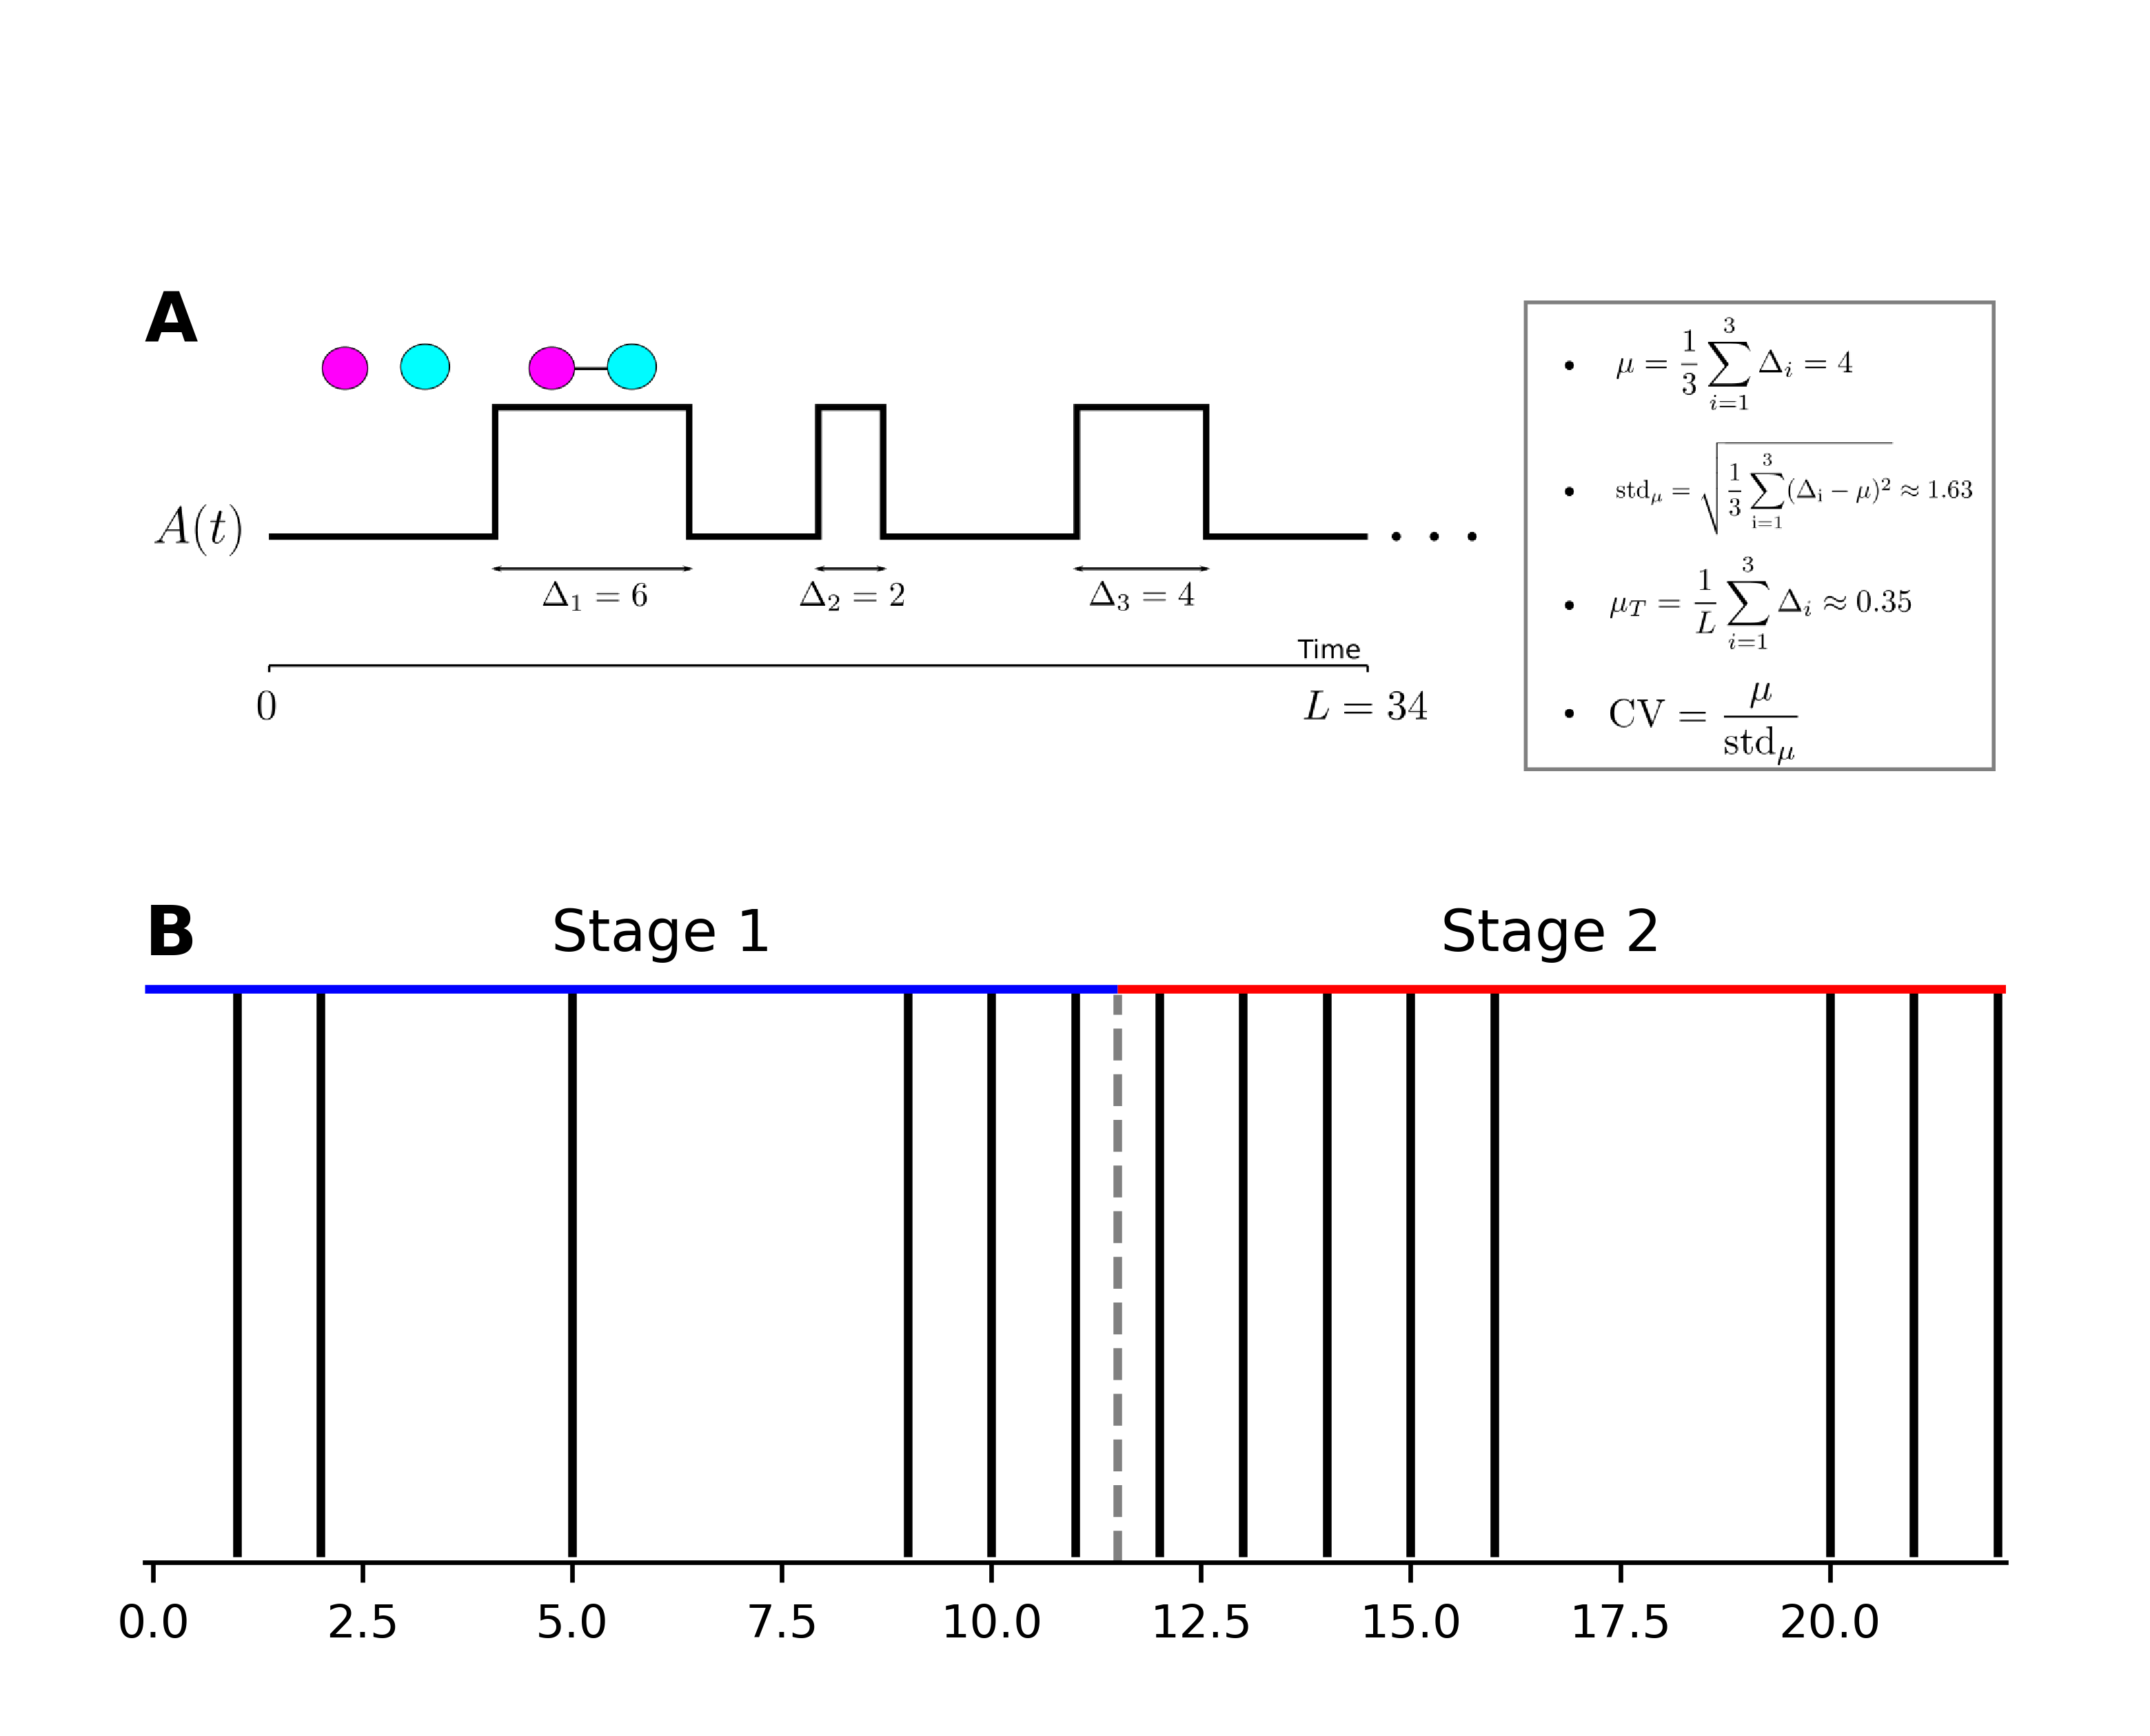

In [5]:
fig = plt.figure(figsize=(5, 4), dpi=600)

gs1 = fig.add_gridspec(nrows=1, ncols=1, left=0.05, right=0.95, bottom=0.45, top=0.95)
gs2 = fig.add_gridspec(nrows=1, ncols=1, left=0.05, right=0.95, bottom=0.08, top=0.43)

# Panel A
ax1 = plt.subplot(gs1[0])
png = plt.imread("img/n5.0.0/cartton_act.png")
plt.sca(ax1)
im = plt.imshow(png, interpolation='none')
plt.axis('off')    
pad = 10
plt.xlim(-pad, png.shape[1]+pad)
plt.ylim(png.shape[0]+pad, -pad) 

# Panel B
ax2 = plt.subplot(gs2[0])

plt.sca(ax2)
plt.vlines(np.arange(len(x))[x==1], 0, 1,  color='k', label='spike-train')
#plt.plot(mask['1'], lw=1, label='Stage 1', color='blue')
#plt.plot(mask['2'], lw=1, label='Stage 2', color='red')
plt.hlines(1,-0.1,11.5,color="blue")
plt.hlines(1,11.5,22.1,color="red")
plt.vlines(11.5,-0.01,0.99,ls="--", color="gray")
plt.xlim(-0.1,22.1)
plt.ylim(-0.01,1.01)
ax2.spines["top"].set_visible(False)
ax2.spines["right"].set_visible(False)
ax2.spines["left"].set_visible(False)
plt.yticks([])
#plt.legend()

bg = plot.Background(visible=False)
plot.add_panel_letters(fig, axes=[ax1, ax2], fontsize=12,
                       xpos=[0,0], ypos=[0.9, 1.05])
bg.axes.text(0.3, 0.45, "Stage 1", ha='center', fontsize=MEDIUM_SIZE)
bg.axes.text(0.73, 0.45, "Stage 2", ha='center', fontsize=MEDIUM_SIZE)

plt.savefig("img/n5.0.2/example_burst_stats.png")

#### Finding the length of burst durations

In [6]:
print(f'burst lengths = {bst.find_activation_sequences(x, dt=None,find_zeros=False)}')

burst lengths = [2 1 8 3]


#### Finding the length of burst durations for segments of the spike-train using a mask

In [7]:
for idx, key in enumerate(mask):
    print(f'Mask {idx}, burst lengths = {bst.masked_find_activation_sequences(x, mask[key], dt=None, drop_edges=False, find_zeros=False)}')

Mask 0, burst lengths = [2 1 3]
Mask 1, burst lengths = [5 3]


#### Finding the length of burst durations for segments of the spike-train using a mask dropping the bursts in the edge between masks

In [8]:
for idx, key in enumerate(mask):
    print(f'Mask {idx}, burst lengths = {bst.masked_find_activation_sequences(x, mask[key], dt=None, drop_edges=True, find_zeros=False)}')

Mask 0, burst lengths = [2 1]
Mask 1, burst lengths = [3]


In [9]:
spike_train = np.ones((1176,540,len(x)))*x
mask        = {}
mask['1']   = (np.ones((540,len(x)))*np.array([1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0])).astype(bool)
mask['2']   = np.logical_not(mask['1'])

In [10]:
bst.find_start_end(x, find_zeros=False)

array([[ 1,  3],
       [ 5,  6],
       [ 9, 17],
       [20, 23]])

In [11]:
bst.find_activation_sequences(x, find_zeros=False)

array([2, 1, 8, 3])

In [12]:
bst.masked_find_activation_sequences(spike_train[0,0], mask["1"][0], dt=None, drop_edges=True, pad=False)

array([2, 1])

In [13]:
out = bst.tensor_find_activation_sequences(spike_train, mask["1"], dt=None, drop_edges=True, n_jobs=1)

  0%|          |  : 0/1176 [00:00<?,       ?it/s]

In [14]:
out = bst.tensor_burstness_stats(spike_train, mask["2"], drop_edges=True, samples=np.sum(mask["1"])*540, find_zeros=False, dt=None, n_jobs=1)

  0%|          |  : 0/1176 [00:00<?,       ?it/s]